In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [52]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [14]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [20]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(engine, reflect=True)
Base.classes.keys()
# reflect the tables


['measurement', 'station']

In [21]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [23]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [24]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [90]:
# Find the most recent date in the data set.
#date = dt.datetime(2017, 8, 23)
recent = session.query(measurement.date).order_by(measurement.date.desc()).first()
year = int(recent[0][:4])
month = int(recent[0][6:7])
day = int(recent[0][-2:])
import datetime
x = datetime.date(year - 1, month, day)
x

datetime.date(2016, 8, 23)

('2017-08-23',)
2016-08-23


NameError: name 'plot' is not defined

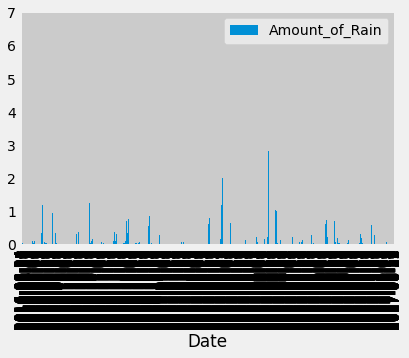

In [123]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
print(recent)
# Calculate the date one year from the last date in data set.
x = datetime.date(year - 1, month, day)
print(x)

# Perform a query to retrieve the data and precipitation scores
precip = session.query(measurement.prcp, measurement.date).\
    filter(measurement.date > x).\
    order_by(measurement.date).all()
precip
# Save the query results as a Pandas DataFrame and set the index to the date column
rain_rows = [{"Date": row[1], "Amount_of_Rain": row[0]} for row in precip]
rain_rows

#x_axis = np.arange(len(precip))

#pd.dataframe.plt.bar(x_axis, precip[0], color='r', alpha=0.5, align="center")

#pd.DataFrame.plot.bar("Date", "Amount_of_Rain")

pd.DataFrame(rain_rows).set_index("Date").plot.bar()
tick_locations = [value for value in x_axis]
plot.xticks(tick_locations, rotation="vertical")

#plt.ylabel("Inches of Precipitation")
#plt.xlabel("")
#plt.title("Precip in the Last Year")
plt.show()

# Sort the dataframe by date


# Use Pandas Plotting with Matplotlib to plot the data




### Use Pandas to calcualte the summary statistics for the precipitation data


# Exploratory Station Analysis

In [ ]:
# Design a query to calculate the total number stations in the dataset


In [ ]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.


In [ ]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close session

In [ ]:
# Close Session
session.close()